In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict

# 1. 데이터 분포 확인

In [35]:
#path="./gdrive/My Drive/Colab Notebooks/mitbih_database"
path="./(록스)mitbih_database/"
classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=='csv':
        records.append(path+"/"+f)

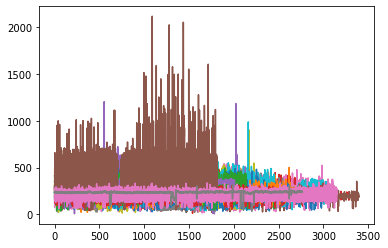

In [36]:
avg_list=[]
names=[]
for i in range(len(annotations)):
    names.append(annotations[i].split('/')[-1].split('.')[0].split('a')[0])
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    a_list=[]
    for i in range(3,len(lines)):
        now=list(filter(None,lines[i].split(" ")))[1]
        before=list(filter(None,lines[i-1].split(" ")))[1]
        a_list.append(int(now)-int(before))

    plt.plot(range(0,len(a_list)),a_list)

    a_array=np.array(a_list)
    avg=np.mean(a_array)
    avg_list.append(avg)

■■■ 인원별 평균 비트의 길이 : 287.324873424873 ■■■


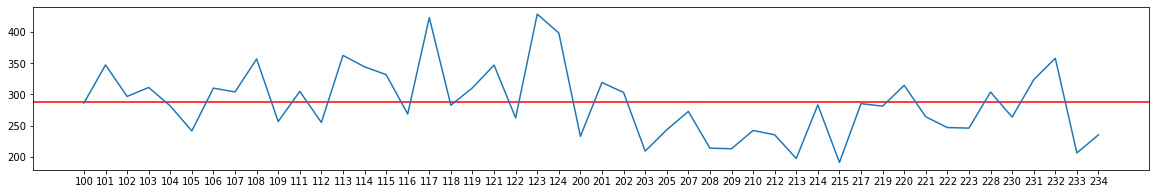

In [37]:
print("■■■ 인원별 평균 비트의 길이 :",sum(avg_list)/len(avg_list),"■■■")
plt.figure(figsize=(20, 3))
plt.axhline(y=sum(avg_list)/len(avg_list), xmin=0, xmax=1,color='red')
plt.plot(names,avg_list)

In [38]:
person_aux_detection=defaultdict(int)
class_aux_dectection=defaultdict(int)

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
#maximum_counting=10000
X,Y=[],[]

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    a=[]
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for j in range(3,len(lines)): # 1번 ~ 2번: 시작 지점이라 이상함
        now_tmp=list(filter(None,lines[j].split(" ")))
        # AUX 부분에 이상한 것 있으면 확인
        if now_tmp[-1] != '0\n':
            #print(records[i],":",now_tmp[-1].split("\t")[1])
            person_aux_detection[records[i].split('/')[-1].split('.')[0]]+=1
            class_aux_dectection[now_tmp[-1].split("\t")[1]]+=1
        before_tmp=list(filter(None,lines[j-1].split(" ")))
        now_num_sample=int(now_tmp[1])
        before_num_sample=int(before_tmp[1])
        beat_type=now_tmp[2]
        if (beat_type in classes):
            beat_idx=classes.index(beat_type)
            count_classes[beat_idx]+=1
            beat=signals[before_num_sample:now_num_sample]
            X.append(beat)
            Y.append(beat_idx)

102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


In [39]:
print(len(X))
print(len(Y))

103371
103371


In [40]:
df_class_aux_dectection = pd.DataFrame([(k.split('\n')[0],v) for k,v in class_aux_dectection.items()],columns=['class','aux_num'])
df_person_aux_detection = pd.DataFrame([(k, v) for k, v in person_aux_detection.items()], columns=['id', 'aux_num'])
display(df_class_aux_dectection)
display(df_person_aux_detection)

,class,aux_num
0,(B,219
1,(N,470
2,(VT,61
3,(T,83
4,(SVTA,26
5,(NOD,36
6,(IVR,4
7,(AFIB,102
8,(AFL,45
9,(VFL,6


,id,aux_num
0,106,40
1,114,2
2,119,102
3,124,12
4,200,147
5,201,34
6,202,7
7,203,44
8,205,12
9,207,23


In [41]:
print("전체 X 값 :",len(X))
print("Aux 값 찍힌곳 :",sum(list(df_class_aux_dectection.iloc[:,1])))
print("비율 :",round((sum(list(df_class_aux_dectection.iloc[:,1]))/len(X))*100,2))

전체 X 값 : 103371
Aux 값 찍힌곳 : 1632
비율 : 1.58


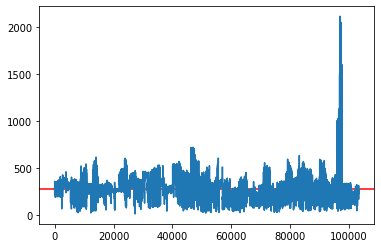

In [42]:
X_len=[len(x) for x in X]
plt.axhline(y=sum(X_len)/len(X_len), xmin=0, xmax=1, color='red')
plt.plot(range(0,len(X_len)),X_len)

데이터의 개수 103371
평균 280.57439707461475
분산 6399.240063453944
표준 편차 79.9952502555867
최대값 2114
최소값 11
중앙값 270.0
1사분위 233.0
2사분위 270.0
3사분위 322.0
1 시그마 적용: 0.730407948070542
2 시그마 적용: 0.9619429046831316


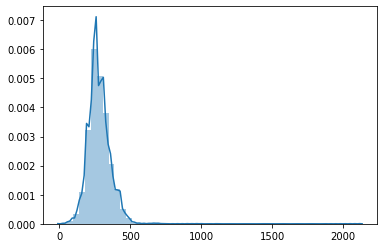

In [43]:
import seaborn as sns
len_x=[len(x) for x in X]

print("데이터의 개수",len(len_x)) # 데이터의 개수
print("평균",np.mean(len_x)) # 평균
print("분산",np.var(len_x)) # 분산
print("표준 편차",np.std(len_x)) # 표준 편차
print("최대값",np.max(len_x)) # 최대값
print("최소값",np.min(len_x)) # 최소값
print("중앙값",np.median(len_x)) # 중앙값
print("1사분위",np.percentile(len_x, 25)) # 1사분위 수
print("2사분위",np.percentile(len_x, 50)) # 2사분위 수 = 중앙값
print("3사분위",np.percentile(len_x, 75)) # 3사분위 수

sns.distplot(len_x)

upper=np.mean(len_x)+np.std(len_x)
lower=np.mean(len_x)-np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1

print("1 시그마 적용:",cnt/len(len_x))
upper=np.mean(len_x)+2*np.std(len_x)
lower=np.mean(len_x)-2*np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1
print("2 시그마 적용:",cnt/len(len_x))

## 결론
### 1) 2시그마 범위 안에 97%가 포함되므로 비트 단위를 mean + 2sigma로 표현한다.
### 2) window size/2를 mean+2sigma로 활용한다.

In [44]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        print(classes[Y[i]])
print(np.shape(X))

(103371,) (103371,)
N
A
V
/
L
R
(103371,)


# 2. 데이터 전처리

In [50]:
window_size = int((np.mean(len_x)+2*np.std(len_x))/2)
maximum_counting = 100000

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=="csv":
        records.append(path+"/"+f)
        
for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]

    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for line in lines[1:]: #lines의 0은 Header
        tmp=line.split(' ')
        tmp=filter(None, tmp)
        next(tmp)
        pos=int(next(tmp))
        arrhythmia_type=next(tmp)
        if(arrhythmia_type in classes):
            arrhythmia_index=classes.index(arrhythmia_type)
            if count_classes[arrhythmia_index]> maximum_counting:
                continue
            else:
                count_classes[arrhythmia_index]+=1
                if(window_size<pos and pos<(len(signals)-window_size)): 
                    beat=signals[pos-window_size+1:pos+window_size] #beat size
                    X.append(beat)
                    Y.append(arrhythmia_index)

102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


## 2-1. 데이터 shape

(103345, 439) (103345,)
N
A
V
/
L
R


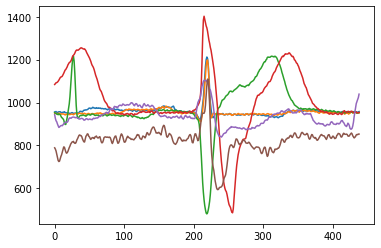

In [51]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        plt.plot(X[i])
        print(classes[Y[i]])

In [52]:
# X 배열 끝에 Y값 삽입
for i in range(len(X)):
    X[i].append(Y[i])
    
X_train_df = pd.DataFrame(X)
#각각의 beat type의 count
per_class=X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class) #V5 포함했을 때와 비교했을 때 '5'의 카운트가 크게 차이남

0    74737
1     8070
2     7253
4     7122
5     3618
3     2545
Name: 439, dtype: int64


## 2-2. Resampling
### 5000 이상 : 중복 X   // 5000 이하 : 중복 O

In [53]:
from sklearn.utils import resample

resampled_X_train_df=pd.DataFrame()
for name, group in X_train_df.groupby(X_train_df[X_train_df.shape[1]-1]):
    if len(group)>5000:
        tmp=resample(group,replace=False,n_samples=5000, random_state=880818)
    else:
        tmp=resample(group,replace=True, n_samples=5000, random_state=880818)
    print(len(tmp))
    resampled_X_train_df=pd.concat([resampled_X_train_df,tmp])
print(len(resampled_X_train_df))
resampled_X_train_df

5000
5000
5000
5000
5000
5000
30000


,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
100823,949,945,942,941,941,936,940,943,945,945,...,951,947,945,942,937,937,936,934,936,0
99672,1125,1133,1135,1139,1141,1142,1144,1149,1149,1153,...,1287,1314,1338,1353,1356,1345,1325,1290,1244,0
27975,853,857,857,860,864,867,871,875,881,888,...,804,807,805,805,802,805,807,811,812,0
86694,1054,1040,1005,954,912,884,875,882,897,909,...,980,971,966,965,968,970,967,967,968,0
21718,818,817,816,813,814,814,815,817,818,816,...,882,881,878,872,869,863,861,858,860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76899,1151,1153,1149,1160,1168,1170,1169,1167,1170,1174,...,985,985,982,982,983,985,988,985,982,5
78270,1041,1039,1043,1048,1054,1052,1052,1049,1057,1063,...,957,960,957,958,961,964,962,962,957,5
12208,1167,1174,1180,1185,1190,1197,1205,1211,1219,1222,...,942,940,941,943,944,945,944,944,943,5
12072,988,994,1001,1007,1012,1012,1013,1018,1019,1018,...,939,937,937,940,940,938,937,932,924,5


# 3. Modeling
## 3-1. Set 분할

In [55]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

train, test=train_test_split(resampled_X_train_df,test_size=0.30)
print("X_train : ",len(train))
print("X_test : ",len(test))

X_train :  21000
X_test :  9000


In [56]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print("Y shape :",np.shape(y_train),np.shape(y_test))

x_train=train.iloc[:,:train.shape[1]-1].values
x_test=test.iloc[:,:test.shape[1]-1].values
x_train=x_train.reshape(len(x_train),x_train.shape[1],1)
x_test=x_test.reshape(len(x_test),x_test.shape[1],1)
print("X shape :",np.shape(x_train),np.shape(x_test))

Y shape : (21000, 6) (9000, 6)
X shape : (21000, 439, 1) (9000, 439, 1)


## 3-2. 모델 학습

In [57]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix

In [69]:
x_test=x_test.reshape(len(x_test),x_test.shape[1])
x_test
np.shape(x_test)

x_train=x_train.reshape(len(x_train),x_train.shape[1])
np.shape(x_train)

(21000, 439)

In [70]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(x_train))
train_data_minMaxScaled = minMaxScaler.transform(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [71]:
def network(x_train,y_train,x_test,y_test):
    im_shape=(x_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape),name='inputs_cnn')
    
    #conv. layer 1
    conv1_1=Convolution1D(64,(6),activation="elu",input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3),strides=(2),padding="same")(conv1_1)
    #conv. layer 2
    conv2_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    #conv. layer 3
    conv3_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv3_1)
    #conv. layer 4
    conv4_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    #conv. layer 5
    conv5_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv5_1)
    #flattened layer 1
    flatten=Flatten()(pool3)
    #dense layers
    dense_end1=Dense(1024,activation='elu')(flatten)
    
    #output layers
    main_output=Dense(6,activation='softmax',name='main_output')(dense_end1)
    
    model=Model(inputs=inputs_cnn,outputs=main_output)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    callbacks=[EarlyStopping(monitor='val_loss',patience=8),
              ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]
    
    history=model.fit(x_train, y_train, epochs=5, callbacks=callbacks, batch_size=32,validation_data=(x_test,y_test))
    model.load_weights('best_model.h5')
    return (model, history)

### 1차: Accuracy 평가

In [73]:
model, history=network(x_train,y_train,x_test,y_test)
scores=model.evaluate((x_test),y_test,verbose=0)
print("Accuracy:",scores[1]*100)

Epoch 1/5
657/657 [==============================] - 422s 642ms/step - loss: 0.3865 - accuracy: 0.9381 - val_loss: 25.8728 - val_accuracy: 0.3772
Epoch 2/5
657/657 [==============================] - 451s 686ms/step - loss: 0.1271 - accuracy: 0.9717 - val_loss: 11.4403 - val_accuracy: 0.5473
Epoch 3/5
657/657 [==============================] - 515s 785ms/step - loss: 0.1016 - accuracy: 0.9761 - val_loss: 75.5561 - val_accuracy: 0.3522
Epoch 4/5
657/657 [==============================] - 461s 701ms/step - loss: 0.1308 - accuracy: 0.9771 - val_loss: 85.4341 - val_accuracy: 0.2138
Epoch 5/5
657/657 [==============================] - 426s 649ms/step - loss: 0.0668 - accuracy: 0.9860 - val_loss: 0.8991 - val_accuracy: 0.8489
Accuracy: 84.88888740539551


### Confusion Matrix

[[1331   16    2   36  108    0]
 [  66  976    7    2  428    0]
 [  11    1 1326   43   90    0]
 [  92   92    4 1059  292    0]
 [   9   29    0   18 1447    0]
 [   4    0    0    0   10 1501]]


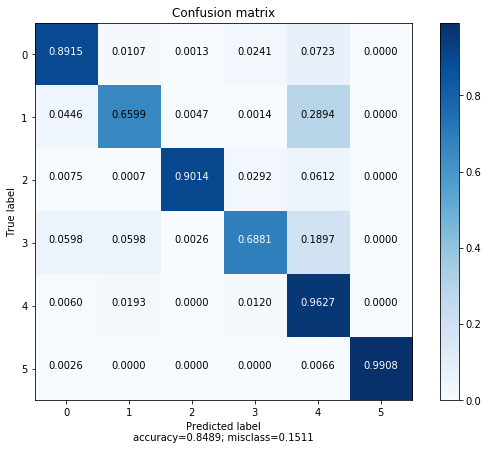

In [74]:
y_pred=model.predict(x_test)
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cnf_matrix, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix')